In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import scipy.ndimage as ndimage
import cv2

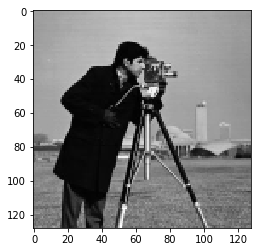

In [2]:
#read the image
img1=cv2.imread('cameraman.jpg',0)
img=cv2.resize(img1,(128,128));
plt.imshow(img,'gray')
plt.show()
m,n=img.shape

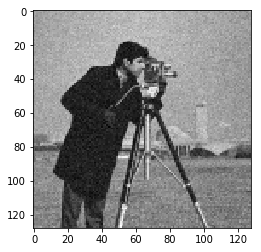

In [3]:
#Add gaussian noise
noise = np.random.randn(m,n) *10;
img_noisy=img+noise;
plt.imshow(img_noisy,'gray')
plt.show()

In [4]:
def create_Wt_matrix(n, m, img, thet, k):
    W = [[0 for j in range(n*m)] for i in range(n*m)]

    for i in range(n):
        for j in range(m):
            # Upper row
            if 0 <= i-1< n and 0<= j-1 <m:
                dist = img[i][j] - img[i-1][j-1]
                if dist<=k:
                    W[i*n + j][ (i-1)*n + j-1] = np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i-1)*n + j-1] =0;

            if 0 <= i-1< n and 0<= j <m:
                dist = img[i][j] - img[i-1][j]
                if dist<=k:
                    W[i*n + j][ (i-1)*n + j] =  np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i-1)*n + j] =0;
                    
            if 0 <= i-1< n and 0<= j+1 <m:
                dist = img[i][j] - img[i-1][j+1]
                if dist<=k:
                    W[i*n + j][ (i-1)*n + j+1] = np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i-1)*n + j+1] =0;

            # same row
            if 0 <= i< n and 0<= j-1 <m:
                dist = img[i][j] - img[i][j-1]
                if dist<=k:
                    W[i*n + j][ (i)*n + j-1] =  np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                     W[i*n + j][ (i)*n + j-1]=0;
                        

            if 0 <= i< n and 0<= j <m:
                dist = img[i][j] - img[i][j]
                if dist<=k:
                    W[i*n + j][ (i)*n + j] =  np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i)*n + j]=0;
                    
            
            if 0 <= i< n and 0<= j+1 <m:
                dist = img[i][j] - img[i][j+1]
                if dist<=k:
                    W[i*n + j][ (i)*n + j+1] = np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    
                    W[i*n + j][ (i)*n + j+1]=0;

            # Next row
            if 0 <= i+1< n and 0<= j-1 <m:
                dist = img[i][j] - img[i+1][j-1]
                if dist<=k:
                    W[i*n + j][ (i+1)*n + j-1] = np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i+1)*n + j-1] = 0;

            if 0 <= i+1< n and 0<= j <m:
                dist = img[i][j] - img[i+1][j]
                if dist<=k:
                    W[i*n + j][ (i+1)*n + j] =  np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i+1)*n + j] = 0;

            if 0 <= i+1< n and 0<= j+1 <m:
                dist = img[i][j] - img[i+1][j+1]
                if dist<=k:
                    W[i*n + j][ (i+1)*n + j+1] =  np.exp( -(dist*dist)/ (2*thet*thet) );
                else:
                    W[i*n + j][ (i+1)*n + j+1]=0;


    return W

def find_eigenvalues(W):
    summ = lambda x,y: x+y
    D = [reduce(summ, neigh) for neigh in W]
    D = np.diag(D)
    L = np.subtract(D, W)
    eigv, eigvecs= np.linalg.eig(L)
    eigvecs = np.transpose(eigvecs)
    s = np.argsort(eigv)
    eigv = eigv[s]
    eigvecs = eigvecs[s]
    return eigv, eigvecs

def filtering(mat,gamma,eigv,eigvec):
    y=mat.flatten();
    result=np.zeros((m*n,))
    for i in range(m*n):
        for j in range(len(eigv)):
            y_cap=np.inner(y,eigvec[j]);
            h=1/(1+gamma*eigv[j]);
            result[i]=result[i]+y_cap*h*eigvec[j,i];
    return result

In [5]:
W=create_Wt_matrix(m,n,img_noisy, 0.1, 0)
print 'Weight matrix created'

Weight matrix created


In [6]:
eigv,eigvec = find_eigenvalues(W);
print 'Eigen values and vectors calculated'

MemoryError: 

In [ ]:
filtered_result=filtering(img_noisy,10,eigv,eigvec)
print 'Filtering done'

In [ ]:
output=filtered_result.reshape(m,n);

In [ ]:
plt.imshow(output,'gray')
plt.show()

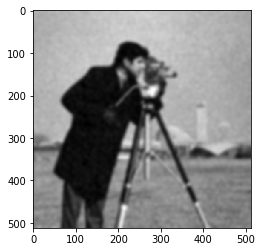

In [4]:
blur = cv2.GaussianBlur(img_noisy,(15,15),3.5)
plt.imshow(blur,'gray')
plt.show()